# Projeto DAA


In [318]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, mean_absolute_error,mean_squared_error,classification_report
import numpy as np

In [319]:
#Loading the data
trainDf = pd.read_csv("test_data_treated.csv")
testDf = pd.read_csv("test_data_treated.csv")

In [320]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


In [321]:
#Exploration of the city_name field
print(trainDf['city_name'].value_counts())

#City name must be droped


Guimaraes    5000
Name: city_name, dtype: int64


In [322]:
print(trainDf['incidents'].value_counts())

None         2028
High         1073
Low           718
Very_High     603
Medium        578
Name: incidents, dtype: int64


In [323]:
# Atribute an order so its easier to understand
replace_map = {'incidents':{'None':0, 'Low':1, 'Medium':2,'High':3,'Very_High':4}}

trainDf.replace(replace_map,inplace=True)

In [324]:
# Here we clearly need to clarify that Major > moderate but undefined values need investigation
print(trainDf['magnitude_of_delay'].value_counts())

# This collum should be droped due to the unusual large quantity of undefined values

UNDEFINED    4314
MAJOR         678
MODERATE        8
Name: magnitude_of_delay, dtype: int64


In [325]:
print(trainDf['avg_rain'].value_counts())
#These values should be encoded by order of magnitude

Sem Chuva         4756
chuva fraca        214
chuva moderada      27
chuva forte          3
Name: avg_rain, dtype: int64


In [326]:
print(trainDf['luminosity'].value_counts())
#These values should be encoded by order of magnitude

DARK         2489
LIGHT        2325
LOW_LIGHT     186
Name: luminosity, dtype: int64


In [327]:
# Atribute an order so its easier to understand
replace_map1 = {'avg_rain':{'Sem Chuva':0, 'chuva fraca':1, 'chuva moderada':2,'chuva forte':3}}
replace_map2 = {'luminosity': {'DARK':0,'LOW_LIGHT':1,'LIGHT':2,}}


trainDf.replace(replace_map1,inplace=True)
testDf.replace(replace_map1,inplace=True)
trainDf.replace(replace_map2,inplace=True)
testDf.replace(replace_map2,inplace=True)

In [328]:
#Working on dates

trainDf['record_date'] = pd.to_datetime(trainDf['record_date'],format='%Y-%m-%d %H:%M',errors='coerce')
assert trainDf['record_date'].isnull().sum()==0

trainDf['record_date_month'] = trainDf['record_date'].dt.month
trainDf['record_date_day'] = trainDf['record_date'].dt.day
trainDf['record_date_isWeekend'] = trainDf['record_date'].dt.dayofweek
trainDf['record_date_hour'] = trainDf['record_date'].dt.hour
#trainDf['record_date_dayWeek'] = trainDf['record_date'].dt.dayofweek

#If it is a week end
replace_map3 = {0:0,1:0,2:0,3:0,4:0,5:1,6:1}

#If it is a day of the week
#replace_map4 = {0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thrusday",4:"Friday",5:"Saturday",6:"Sunday"}

trainDf['record_date_isWeekend'].replace(replace_map3,inplace=True)
#trainDf['record_date_dayWeek'].replace(replace_map4,inplace=True)


testDf['record_date'] = pd.to_datetime(testDf['record_date'],format='%Y-%m-%d %H:%M',errors='coerce')
assert testDf['record_date'].isnull().sum()==0
testDf['record_date_month'] = testDf['record_date'].dt.month
testDf['record_date_day'] = testDf['record_date'].dt.day
testDf['record_date_isWeekend'] = testDf['record_date'].dt.dayofweek
testDf['record_date_hour'] = testDf['record_date'].dt.hour
#testDf['record_date_dayWeek'] = testDf['record_date'].dt.dayofweek

testDf['record_date_isWeekend'].replace(replace_map3,inplace=True)
#testDf['record_date_dayWeek'].replace(replace_map4,inplace=True)


In [329]:
for index,row in trainDf.iterrows():
    if row['record_date_month']==12:
        if row['record_date_day'] == 25 or row['record_date_day'] == 1 or row['record_date_day'] == 8 or row['record_date_day'] == 31 or row['record_date_day'] == 24 :
            row['record_date_isWeekend']=1
    elif row['record_date_month']==1 and row['record_date_day'] == 1:  
            row['record_date_isWeekend']=1
    elif row['record_date_month']==8 and row['record_date_day'] == 15:  
            row['record_date_isWeekend']=1
    elif row['record_date_month']==10 and row['record_date_day'] == 5:  
            row['record_date_isWeekend']=1
    elif row['record_date_month']==11 and row['record_date_day'] == 1:  
            row['record_date_isWeekend']=1
    elif row['record_date_month']==5 and row['record_date_day'] == 25:  
            row['record_date_isWeekend']=1
    elif row['record_date_month']==6 and row['record_date_day'] == 10:  
            row['record_date_isWeekend']=1

for index,row in testDf.iterrows():
    if row['record_date_month']==12:
        if row['record_date_day'] == 25 or row['record_date_day'] == 1 or row['record_date_day'] == 8 or row['record_date_day'] == 31 or row['record_date_day'] == 24 :
            row['record_date_isWeekend']=1
    elif row['record_date_month']==1 and row['record_date_day'] == 1:  
            row['record_date_isWeekend']=1
    elif row['record_date_month']==8 and row['record_date_day'] == 15:  
            row['record_date_isWeekend']=1
    elif row['record_date_month']==10 and row['record_date_day'] == 5:  
            row['record_date_isWeekend']=1
    elif row['record_date_month']==11 and row['record_date_day'] == 1:  
            row['record_date_isWeekend']=1
    elif row['record_date_month']==5 and row['record_date_day'] == 25:  
            row['record_date_isWeekend']=1
    elif row['record_date_month']==6 and row['record_date_day'] == 10:  
            row['record_date_isWeekend']=1


In [330]:
#train["affected_roads"].value_counts()

uniqueRoad = {}

for roads in trainDf["affected_roads"]:   
    for road in str(roads).split(","):
        if uniqueRoad.get(road) == None:
            uniqueRoad[road] = 1
        else:
            uniqueRoad[road] +=1

print(uniqueRoad)

#We could one hot encode road, in a way to translate the number of times

{'': 2968, 'N101': 23460, 'R206': 327, 'N105': 2155, 'N206': 174, 'N309': 199, 'IC5': 108, 'nan': 85, 'N310': 17, 'N207-4': 22, 'IC5 - N206': 1, 'EM579': 16}


In [331]:
data = []
for roads in trainDf["affected_roads"]:
    roadsList=[0,0,0,0,0,0,0,0,0]
    for road in str(roads).split(","):
        if road == "N101":
            roadsList[0]+=1
        elif road == "R206":
            roadsList[1]+=1
        elif road == "N105":
            roadsList[2]+=1
        elif road == "N206":
            roadsList[3]+=1
        elif road == "N309":
            roadsList[4]+=1
        elif road == "IC5":
            roadsList[5]+=1
        elif road == "N310":
            roadsList[6]+=1
        elif road == "EM579":
            roadsList[7]+=1
        elif road == "N207-4":
            roadsList[8]+=1
    data.append(roadsList)


dfRoad = pd.DataFrame(data, columns=["N101","R206","N105","N206","N309","IC5","N310","EM579","N207-4"])


trainDf = trainDf.join(dfRoad)



In [332]:
data = []
for roads in testDf["affected_roads"]:
    roadsList=[0,0,0,0,0,0,0,0,0]
    for road in str(roads).split(","):
        if road == "N101":
            roadsList[0]+=1
        elif road == "R206":
            roadsList[1]+=1
        elif road == "N105":
            roadsList[2]+=1
        elif road == "N206":
            roadsList[3]+=1
        elif road == "N309":
            roadsList[4]+=1
        elif road == "IC5":
            roadsList[5]+=1
        elif road == "N310":
            roadsList[6]+=1
        elif road == "EM579":
            roadsList[7]+=1
        elif road == "N207-4":
            roadsList[8]+=1
    data.append(roadsList)


dfRoad = pd.DataFrame(data, columns=["N101","R206","N105","N206","N309","IC5","N310","EM579","N207-4"])


testDf = testDf.join(dfRoad)



In [333]:
#trainDf["avg_wind_speed"] = preprocessing.MinMaxScaler().fit_transform(np.array(trainDf["avg_wind_speed"]).reshape(-1,1))
#trainDf["avg_temperature"] = preprocessing.MinMaxScaler().fit_transform(np.array(trainDf["avg_temperature"]).reshape(-1,1))
#trainDf["avg_atm_pressure"] = preprocessing.MinMaxScaler().fit_transform(np.array(trainDf["avg_atm_pressure"]).reshape(-1,1))


#Feature scaling
trainDf["avg_wind_speed"] = trainDf["avg_wind_speed"].map(lambda x: x*x)
trainDf["avg_rain"] = trainDf["avg_rain"].map(lambda x: x*x)
#trainDf["delay_in_seconds"] =trainDf["delay_in_seconds"].map(lambda x: round(x/60))

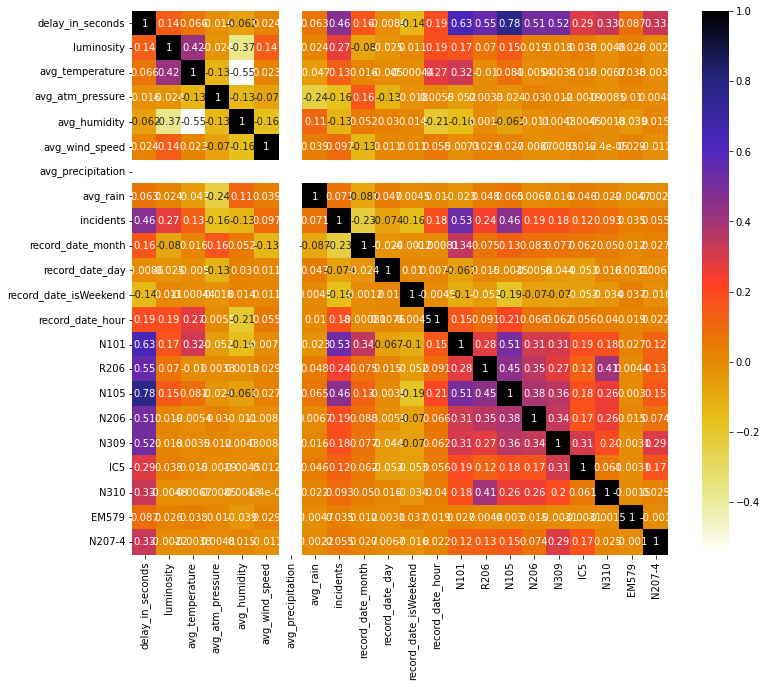

In [334]:
cor = trainDf.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()

## Forest Learner


In [335]:
x = trainDf[["delay_in_seconds","avg_temperature","avg_atm_pressure","avg_humidity","record_date_month","record_date_day","record_date_isWeekend","record_date_hour","N101","R206","N206","N309","IC5","N310","EM579","N207-4"]]
y = trainDf[["incidents"]]


In [336]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 1400,random_state=13122001,min_samples_split= 2,min_samples_leaf= 1,max_depth= 40,bootstrap= False,criterion="entropy") 


In [337]:
#from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]# Create the random grid
#random_grid = {'n_estimators': n_estimators,
#               'max_features': max_features,
 #              'max_depth': max_depth,
  #             'min_samples_split': min_samples_split,
   #            'min_samples_leaf': min_samples_leaf,
    #           'bootstrap': bootstrap}

In [338]:

# Use the random grid to search for best hyperparameters
# First create the base model to tune

# Random search of parameters, using 3 fold cross validation,   
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
#rf_random.fit(x_train, y_train)

#best_random = rf_random.best_estimator_

#rf_random.best_params_
#random_accuracy = evaluate(best_random, x_test, y_test)

In [339]:
from sklearn.model_selection import KFold
import numpy as np
scores =[]
kf = KFold(n_splits=10)
for train,test in kf.split(x): 
    clf.fit(x.loc[train,:],y.loc[train,:].values.ravel())
    score = clf.score(x.loc[test,:],y.loc[test,:])
    scores.append(score)
    y_predicted = clf.predict(x.loc[test,:])
    print(confusion_matrix(y.loc[test,:],y_predicted))
    #print(score)   
print(np.mean(scores))

[[206   1   1   0   0]
 [  2  58   2   0   0]
 [  0   6  48   6   0]
 [  1   1   1  96   6]
 [  0   0   0   8  57]]
[[194   1   0   0   0]
 [  3  72   5   0   0]
 [  1   3  48   1   0]
 [  0   2   5 105   4]
 [  0   1   0   5  50]]
[[199   2   1   0   0]
 [  3  70   3   2   0]
 [  0   5  53   2   0]
 [  0   2   4  93   8]
 [  0   0   0   2  51]]
[[198   5   0   0   0]
 [  5  72   5   0   0]
 [  0   6  44   5   0]
 [  0   2   5  89   5]
 [  0   0   0   6  53]]
[[206   0   0   0   0]
 [  1  61   3   1   0]
 [  0   6  39   4   0]
 [  0   0   2 109  10]
 [  0   0   0   1  57]]
[[207   6   0   0   0]
 [  1  56   0   0   0]
 [  0   5  48   3   0]
 [  0   1   4  94   8]
 [  0   0   0   7  60]]
[[207   1   0   0   0]
 [  3  63   2   0   0]
 [  0   5  53   5   1]
 [  0   0   6  89   6]
 [  0   0   0   6  53]]
[[196   3   0   0   0]
 [  5  66   0   1   0]
 [  0   6  53   4   0]
 [  0   0   2  97   6]
 [  0   0   0   6  55]]
[[192   2   0   0   0]
 [  5  71   4   2   0]
 [  0   5  53   9   0]
 [ 

Resultados até agora:

Features: "delay_in_seconds","avg_temperature","avg_atm_pressure","avg_humidity","record_date_month","record_date_day","record_date_isWeekend","record_date_hour","N101","R206","N105","N206","N309","IC5","N310","EM579","N207-4"

Clf : RandomForestClassifier(n_estimators = 100,random_state=13122001) 

Acc: 0.9251999999999999

%------------------------------------------------------------------------------------------------------------------------

Features : "delay_in_seconds","avg_temperature","avg_atm_pressure","avg_humidity","avg_wind_speed","avg_rain","record_date_month","record_date_day","record_date_isWeekend","record_date_hour","N101","R206","N105","N206","N309","IC5","N310","EM579","N207-4"


Clf : RandomForestClassifier(n_estimators = 100,random_state=13122001) 

Acc: 0.9187999999999998

%------------------------------------------------------------------------------------------------------------------------

Features : "delay_in_seconds","avg_temperature","avg_atm_pressure","avg_humidity","record_date_month","record_date_isWeekend","record_date_hour","N101","R206","N105","N206","N309","IC5","N310","EM579","N207-4"

Clf : RandomForestClassifier(n_estimators = 100,random_state=13122001) 

Acc: 0.8848

%------------------------------------------------------------------------------------------------------------------------

Features: "delay_in_seconds","avg_temperature","avg_atm_pressure","avg_humidity","record_date_month","record_date_day","record_date_isWeekend","record_date_hour","N101","R206","N105","N206","N309","IC5","N310","EM579","N207-4"

Clf : RandomForestClassifier(n_estimators = 1400,random_state=13122001,min_samples_split= 2,min_samples_leaf= 1,max_depth= 40,bootstrap= False) 


Acc: 0.9282

%------------------------------------------------------------------------------------------------------------------------

Features: "delay_in_seconds","avg_temperature","avg_atm_pressure","avg_humidity","record_date_month","record_date_day","record_date_isWeekend","record_date_hour","N101","R206","N105","N206","N309","IC5","N310","EM579","N207-4"

Clf : RandomForestClassifier(n_estimators = 1400,random_state=13122001,min_samples_split= 2,min_samples_leaf= 1,max_depth= 40,bootstrap= False,criterion="entropy") 


Acc: 0.9308

%------------------------------------------------------------------------------------------------------------------------

Features: "delay_in_seconds","avg_temperature","avg_atm_pressure","avg_humidity","record_date_month","record_date_day","record_date_isWeekend","record_date_hour","N101","R206","N206","N309","IC5","N310","EM579","N207-4"

Clf : RandomForestClassifier(n_estimators = 1400,random_state=13122001,min_samples_split= 2,min_samples_leaf= 1,max_depth= 40,bootstrap= False,criterion="entropy") 


Acc: 0.9326


## Neural Network Implementation

In [340]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from sklearn.model_selection import  GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler

x_normal = trainDf[["delay_in_seconds","avg_temperature","avg_atm_pressure","avg_humidity","record_date_month","record_date_day","record_date_isWeekend","record_date_hour","N101","R206","N105","N206","N309","IC5","N310","EM579","N207-4"]]
y_normal = trainDf[["incidents"]]

scaler_x = MinMaxScaler(feature_range=(0,17)).fit(x_normal)
scaler_y = MinMaxScaler(feature_range=(0,1)).fit(y_normal)
x = pd.DataFrame(scaler_x.transform(x_normal[x_normal.columns]),columns=x_normal.columns)
y = y_normal


In [341]:




def buildModel(activation='sigmoid',learning_rate=0.01):
    model = Sequential()
    model.add(Dense(16,input_dim=17, activation=activation))
    model.add(Dense(32,activation=activation))
    model.add(Dense(24,activation=activation))
    model.add(Dense(12,activation=activation))
    model.add(Dense(8, activation=activation))
    model.add(Dense(5, activation='softmax'))

    model.compile(
        loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer= tf.keras.optimizers.Adam(learning_rate),
        metrics= ['accuracy']
    )
    return model





In [342]:
model = buildModel()
TUNING = {
    'activation': ['relu','sigmoid'],
    'learning_rate': [0.01,0.001]
}

kf = KFold(n_splits=5,shuffle=True,random_state=13122001)
model = KerasClassifier(build_fn=buildModel,epochs=20,batch_size=32)

grid_search = GridSearchCV(estimator=model, 
                           param_grid=TUNING,
                           cv=kf,
                           scoring = 'accuracy',
                           refit='True',
                           verbose=1)


#grid_search.fit(x,y,validation_split=0.2)
#model.fit(x,y)




Fitting 5 folds for each of 4 candidates, totalling 20 fits
Epoch 1/20
100/100 [==============================] - 1s 13ms/step - loss: 1.4566 - accuracy: 0.4128 - val_loss: 1.3819 - val_accuracy: 0.5063
Epoch 2/20
100/100 [==============================] - 1s 12ms/step - loss: 1.3211 - accuracy: 0.5781 - val_loss: 1.4557 - val_accuracy: 0.4475
Epoch 3/20
100/100 [==============================] - 1s 12ms/step - loss: 1.3561 - accuracy: 0.5472 - val_loss: 1.3526 - val_accuracy: 0.5437
Epoch 4/20
100/100 [==============================] - 1s 10ms/step - loss: 1.2708 - accuracy: 0.6316 - val_loss: 1.3033 - val_accuracy: 0.5987
Epoch 5/20
100/100 [==============================] - 1s 12ms/step - loss: 1.2597 - accuracy: 0.6441 - val_loss: 1.2852 - val_accuracy: 0.6225
Epoch 6/20
100/100 [==============================] - 1s 15ms/step - loss: 1.2536 - accuracy: 0.6500 - val_loss: 1.2837 - val_accuracy: 0.6212
Epoch 7/20
100/100 [==============================] - 1s 8ms/step - loss: 1.2421 -

KeyboardInterrupt: 

In [ ]:
x_train,y_train,x_test,y_test =train_test_split(x,y,test_size=0.2,random_state=13122001)
from livelossplot import PlotLossesKerasTF

#grid_search.best_estimator_.fit(x,y,epochs=20,validation_data=(x_test,y_test),callbacks=[PlotLossesKearasTF()])

NameError: name 'train_test_split' is not defined

## Submission Tests


In [343]:

x_train = trainDf[["delay_in_seconds","avg_temperature","avg_atm_pressure","avg_humidity","record_date_month","record_date_day","record_date_isWeekend","record_date_hour","N101","R206","N206","N309","IC5","N310","EM579","N207-4"]]
y_train = trainDf[["incidents"]]


x_test = testDf[["delay_in_seconds","avg_temperature","avg_atm_pressure","avg_humidity","record_date_month","record_date_day","record_date_isWeekend","record_date_hour","N101","R206","N206","N309","IC5","N310","EM579","N207-4"]]



In [344]:
# creating a RF classifier
clf2 = RandomForestClassifier(n_estimators = 1400,random_state=13122001,min_samples_split= 2,min_samples_leaf= 1,max_depth= 40,bootstrap= False,criterion="entropy")

 #{'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': False}
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf2.fit(x_train,y_train.values.ravel())
 
# performing predictions on the test dataset
y_pred = clf2.predict(x_test)

#print("ACCURACY OF THE MODEL: ", sk.metrics.accuracy_score(y_test, y_pred))

In [346]:
f = open("myfile.csv", "w")

replace_map = {0:'None', 1:'Low', 2:'Medium',3:'High',4:'Very_High'}

print(y_pred.size)


f.write("RowId,Incidents\n")

for i in range(y_pred.size):
    f.write(str(i+1))
    f.write(",")
    f.write(replace_map[y_pred[i]])
    f.write("\n")

1206
